# Trabajo Computacional 3 - Sistemas Complejos 2018

In [17]:
# Importacion de librerias #
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import community
import infomap
import igraph

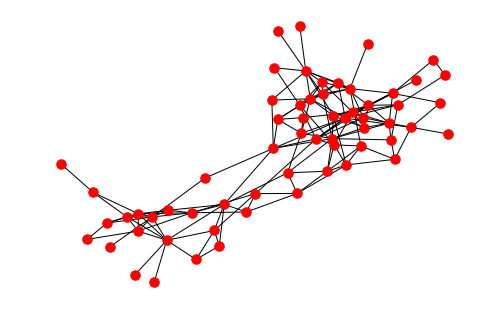

In [2]:
G=nx.read_gml('dolphins.gml')
nx.draw(G, with_labels=False, font_weight='bold',node_size=90)
plt.show()

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

data_gender=ldata('dolphinsGender.txt')
data_gender
colores=[]

# Le agregamos el atributo "genero" al grafo G
for elemento in data_gender:
    G.node[elemento[0]]['genero']=elemento[1]
    
# Creamos un vector de colores que vincula los generos (mismo orden)     
for node in G.node:
    gen = G.node[node]['genero']
    #print(node,gen)
    if gen=='f':
        colores.append('red')
    elif gen=='m':
        colores.append('blue')
    else:
        colores.append('grey')

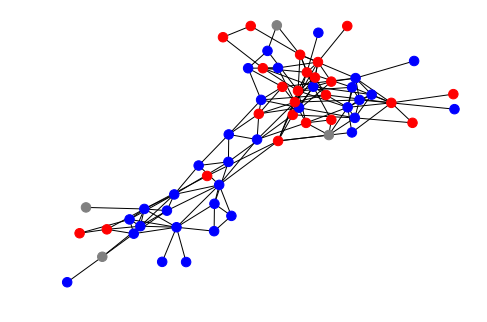

In [4]:
nx.draw(G, with_labels=False,node_color=colores, font_weight='bold',node_grouping='genero',node_size=90)
plt.show()

# Funcion que calcula particiones

In [14]:
def clusterize(nx_Graph, method="infomap"):
    """
    Calcula el agrupamiento en comunidades de un grafo.
    
    In:
        nx_Graph: grafo de networkx
        method: metodo de clustering, puede ser: "infomap", "fastgreedy", "eigenvector", "louvain", "edge_betweenness","label_prop", "walktrap", ""
        
    Out:
        labels_dict: diccionario de nodo : a label al cluster al que pertenece.
    """
    if method == "edge_betweenness":
        nx_Graph = max(nx.connected_component_subgraphs(nx_Graph), key=len)#se queda con la componente más grande.
        print("AVISO: restringiendo a la componente connexa más grade. De otro modo falla el algoritmo de detección de comunidades edge_betweenness.")
    
    isdirected = nx.is_directed(nx_Graph)
    np_adj_list = nx.to_numpy_matrix(nx_Graph)
    g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
    if method=="infomap":
        labels = g.community_infomap(edge_weights="weight").membership
    if method=="label_prop":
        labels = g.community_label_propagation(weights="weight").membership
    if method=="fastgreedy":
        labels = g.community_fastgreedy(weights="weight").as_clustering().membership
    if method=="eigenvector":
        labels = g.community_leading_eigenvector(weights="weight").membership
    if method=="louvain":
        labels = g.community_multilevel(weights="weight").membership
    if method=="edge_betweenness":
        labels = g.community_edge_betweenness(weights="weight", directed=isdirected).as_clustering().membership
    if method=="walktrap":
        labels = g.community_walktrap(weights="weight").as_clustering().membership
    
    label_dict = {node:label for node,label in zip(nx_Graph.nodes(), labels)}
    return label_dict

# Louvain

In [5]:
partition_louvain = community.best_partition(G)
colors = ['red','blue','yellow','grey','orange','violet']

In [19]:
def draw_partitions(partition):
    #drawing
    plt.figure(1,figsize=(10,10)) 
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G)
    count = 0.
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 130,
                                    node_color = colors[int(count)]) 

    nx.draw_networkx_edges(G, pos, alpha=0.2,labels=True)
    plt.axis('off')

    plt.show()

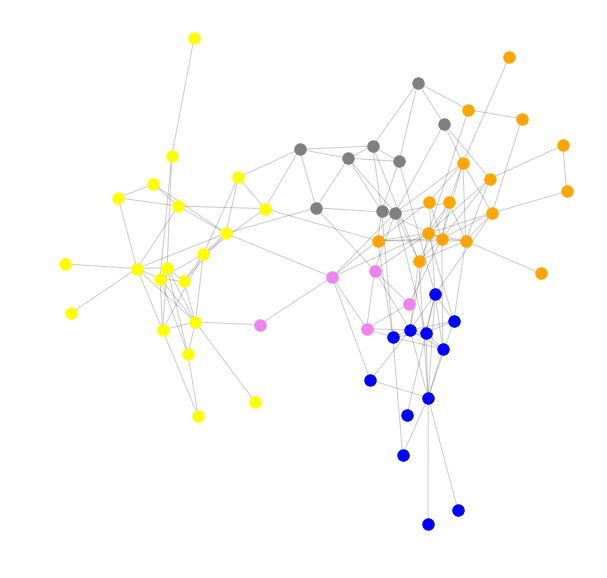

In [20]:
draw_partitions(partition_louvain)

In [7]:
print(partition_louvain)

{u'Haecksel': 0, u'Web': 1, u'Jet': 1, u'SMN5': 0, u'DN16': 1, u'Shmuddel': 3, u'Cross': 0, u'Topless': 0, u'Beescratch': 1, u'CCL': 4, u'SN4': 3, u'MN60': 0, u'Feather': 1, u'Wave': 1, u'SN9': 3, u'Fork': 3, u'MN83': 0, u'Mus': 1, u'DN63': 1, u'DN21': 1, u'SN89': 4, u'MN23': 1, u'Stripes': 3, u'Jonah': 0, u'Zap': 4, u'Five': 0, u'Beak': 2, u'Vau': 0, u'Knit': 1, u'TSN103': 3, u'Grin': 3, u'TR82': 1, u'TR77': 2, u'Double': 4, u'Number1': 1, u'Thumper': 2, u'SN63': 3, u'Zig': 1, u'Whitetip': 3, u'Bumper': 2, u'Ripplefluke': 1, u'Notch': 1, u'Kringel': 2, u'TSN83': 3, u'SN90': 1, u'TR99': 3, u'SN96': 2, u'SN100': 4, u'TR120': 3, u'Fish': 2, u'Quasi': 1, u'Zipfel': 3, u'Hook': 3, u'Trigger': 0, u'PL': 2, u'Patchback': 0, u'Oscar': 2, u'MN105': 0, u'Scabs': 3, u'TR88': 3, u'Gallatin': 1, u'Upbang': 1}


Creamos listas con los nombres y la etiqueta de la comunidad a la cual pertenecen. 
Por ejemplo: nombres_louvain[0] es el nombre de un delfin, comunities_louvain[0] es la etiqueta correspondiente a la comunidad a la cual pertenece dicho delfin. 


In [8]:
nombres_louvain = list(partition_louvain.keys())
comunities_louvain = list(partition_louvain.values())

# Clustering por Edge Betweenness

In [21]:
 partition_edge_betweennes = clusterize(G, method="edge_betweenness")

AVISO: restringiendo a la componente connexa más grade. De otro modo falla el algoritmo de detección de comunidades edge_betweenness.


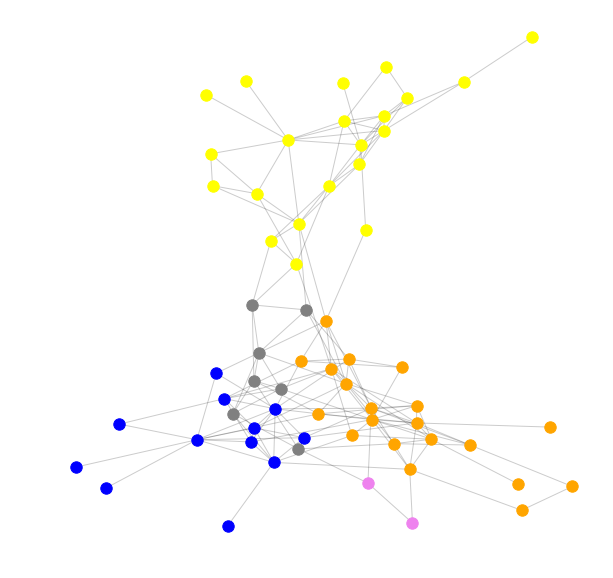

In [23]:
draw_partitions(partition_edge_betweennes)

# Fast Greedy

In [24]:
partition_fast_greedy = nx.algorithms.community.greedy_modularity_communities(G, weight=None)

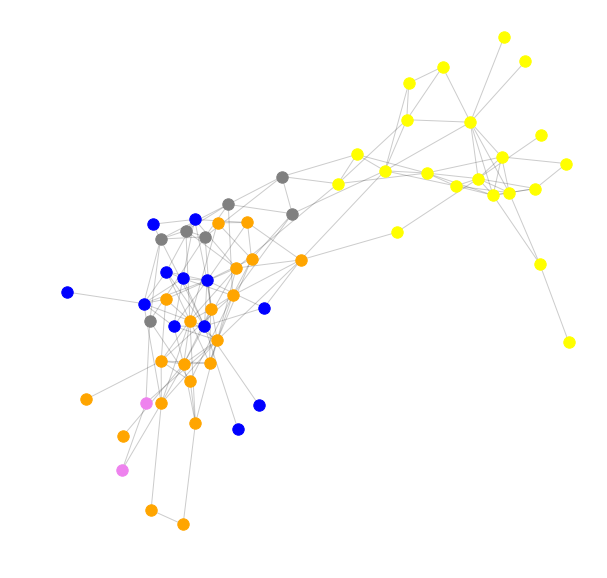

In [25]:
draw_partitions(partition_edge_betweennes)

# Infomap

In [26]:
partition_infomap = clusterize(G, method="infomap")

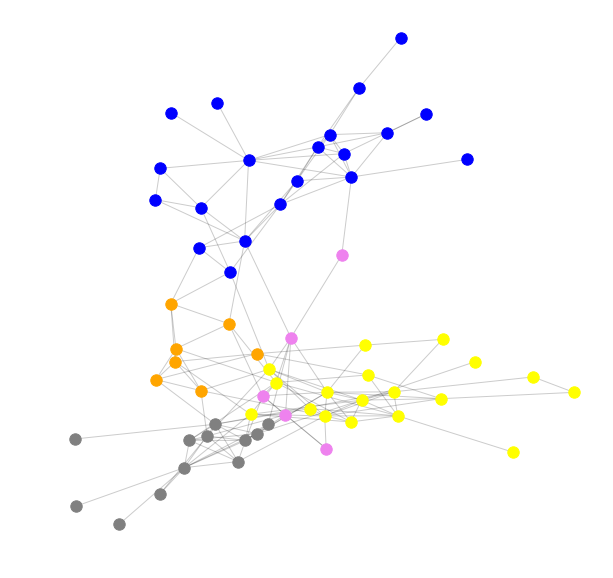

In [27]:
draw_partitions(partition_infomap)